In [1]:
import sys
from pathlib import Path

project_root = Path.cwd().parent
sys.path.append(str(project_root))

from src.utils.visualizations_utils import (
    load_meta_model_benchmarking_results, load_meta_model_benchmarking_filtered_results, plot_uncertainties_and_predictions)

# Load Data

In [2]:
bnn_single_feature = load_meta_model_benchmarking_results(
    "250803_2311_bnn_single_feature"
)
bnn_single_feature_sparse = load_meta_model_benchmarking_results(
    "250803_2236_bnn_single_feature_sparse"
)

der_single_feature_proposed = load_meta_model_benchmarking_results(
    "250803_2300_der_single_feature_meinert_etal_proposed"
)
der_single_feature_proposed_sparse = load_meta_model_benchmarking_results(
    "250803_2251_der_single_feature_meinert_etal_proposed_sparse"
)

der_single_feature_sota = load_meta_model_benchmarking_results(
    "250803_2325_der_single_feature_meinert_etal_sota_"
)

# 1 Feature Visualization

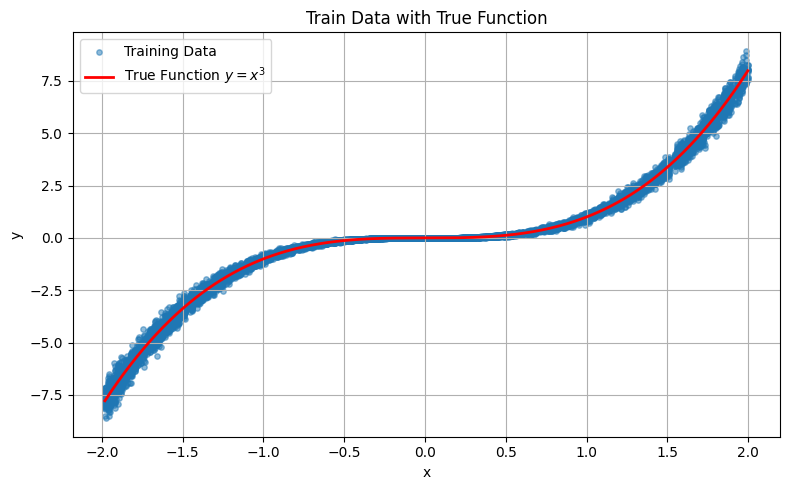

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_train_data_with_true_func_array(X_train, y_train, func=lambda x: x**3, title="Train Data with True Function"):
    """
    Plot scatter of training data (X_train, y_train) with true function curve.

    Parameters:
        X_train (array): Input data, shape (n,) or (n, 1)
        y_train (array): Target values, shape (n,)
        func (callable): True function, e.g., lambda x: x**3
        title (str): Plot title
    """
    X_train = np.squeeze(X_train)  # Ensure shape (n,)
    x_plot = np.linspace(np.min(X_train), np.max(X_train), 300)
    y_true = func(x_plot)

    plt.figure(figsize=(8, 5))
    plt.scatter(X_train, y_train, alpha=0.5, label="Training Data", s=15)
    plt.plot(x_plot, y_true, color="red", linewidth=2, label="True Function $y = x^3$")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


plot_train_data_with_true_func_array(
    bnn_single_feature["X_train"],
    bnn_single_feature["y_train"],
    func=lambda x: x**3,
    title="Train Data with True Function",
)


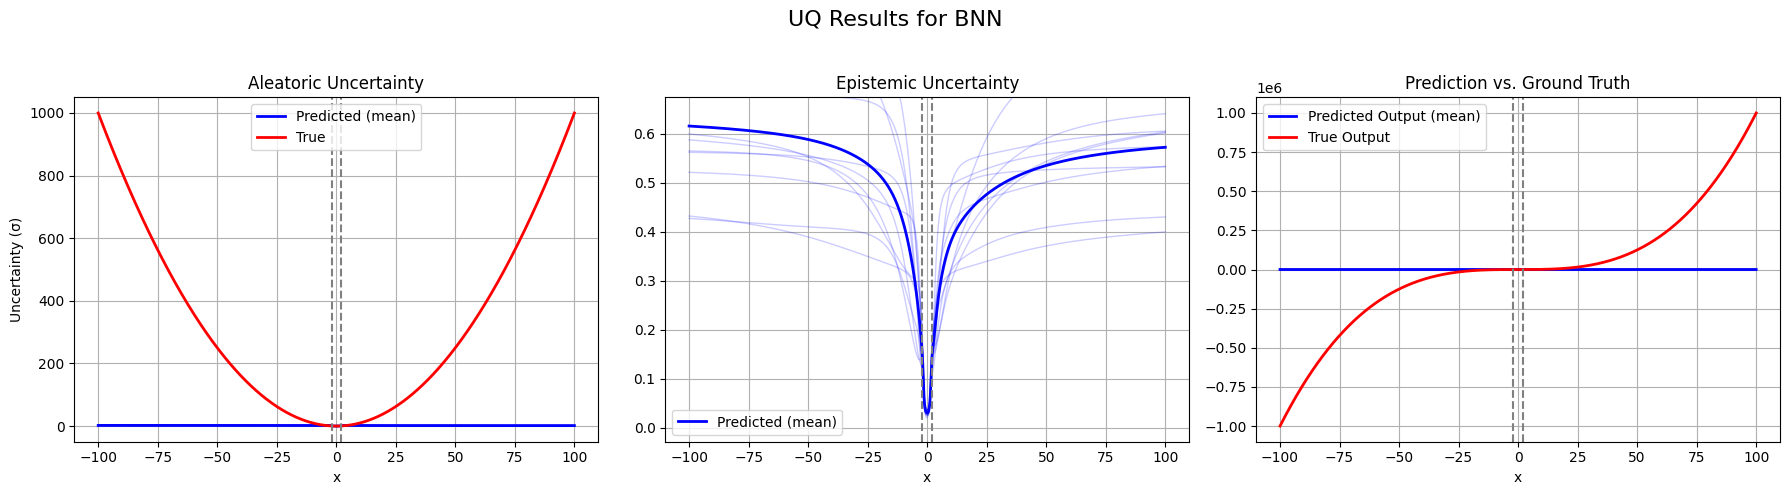

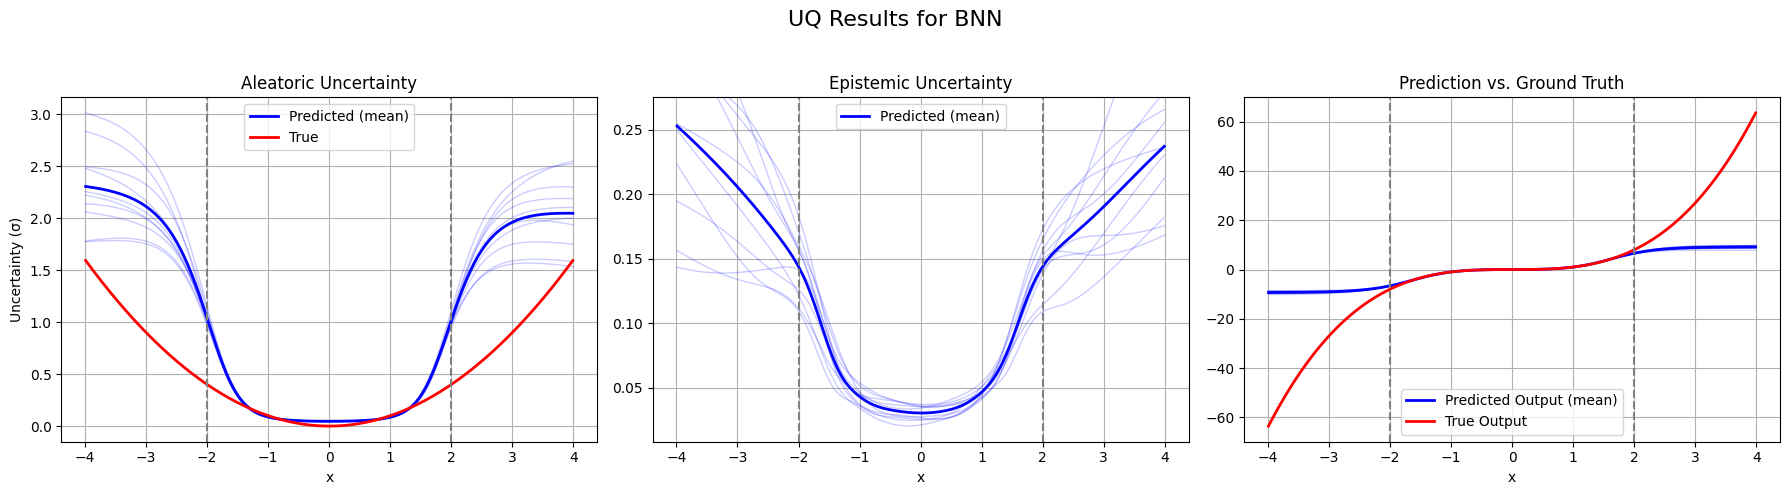

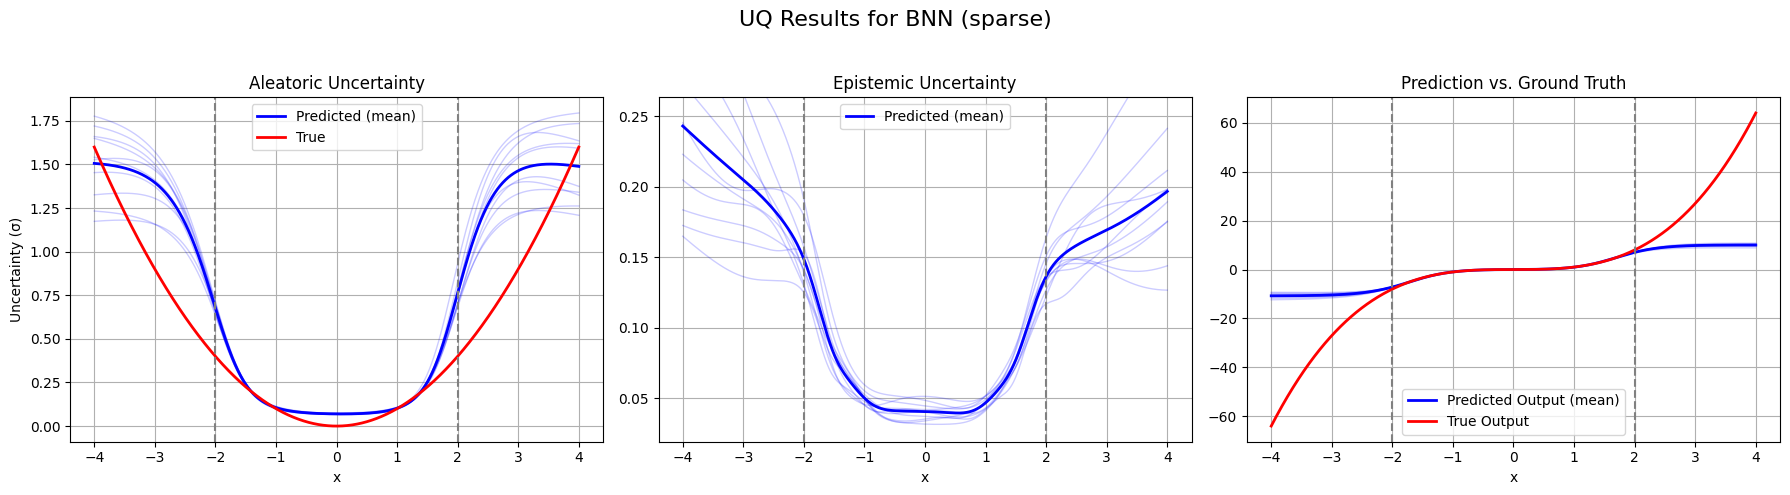

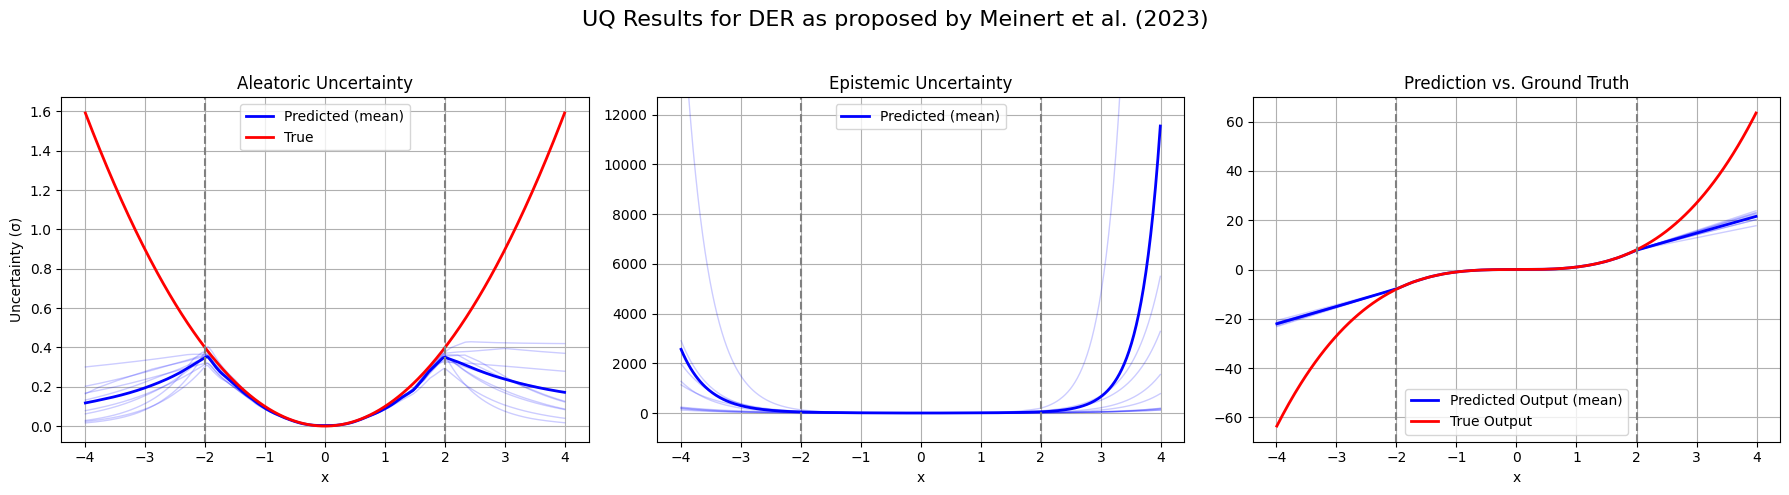

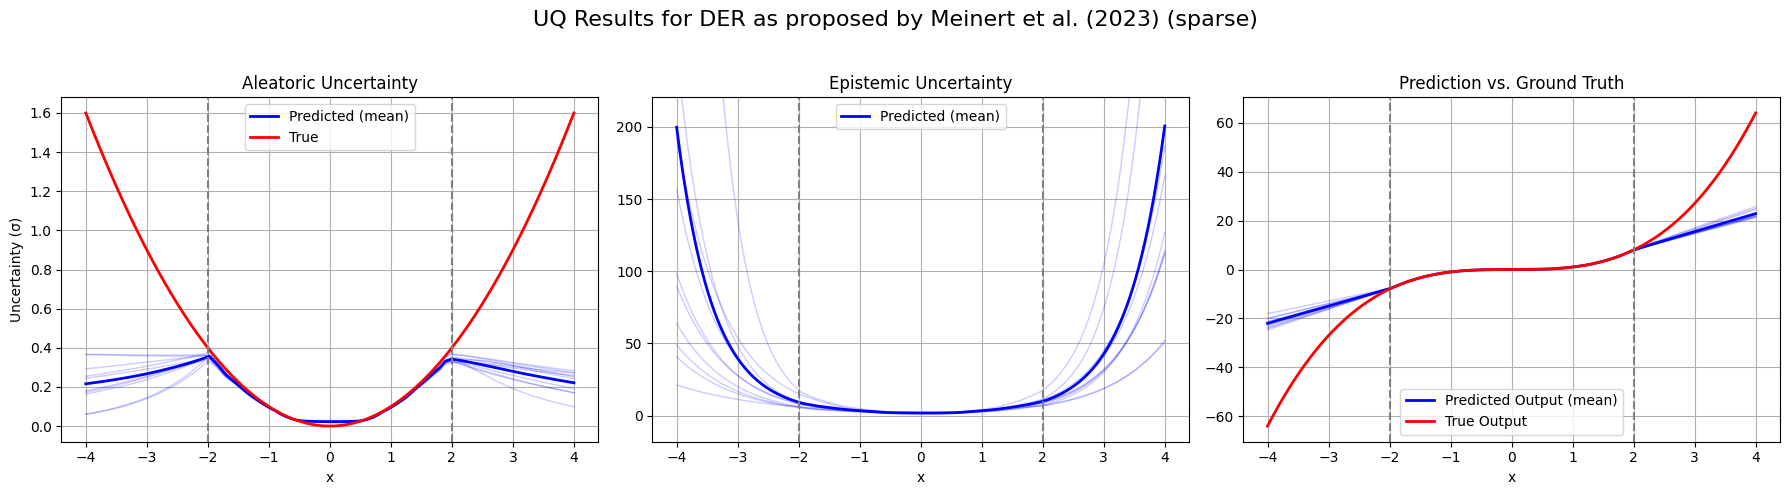

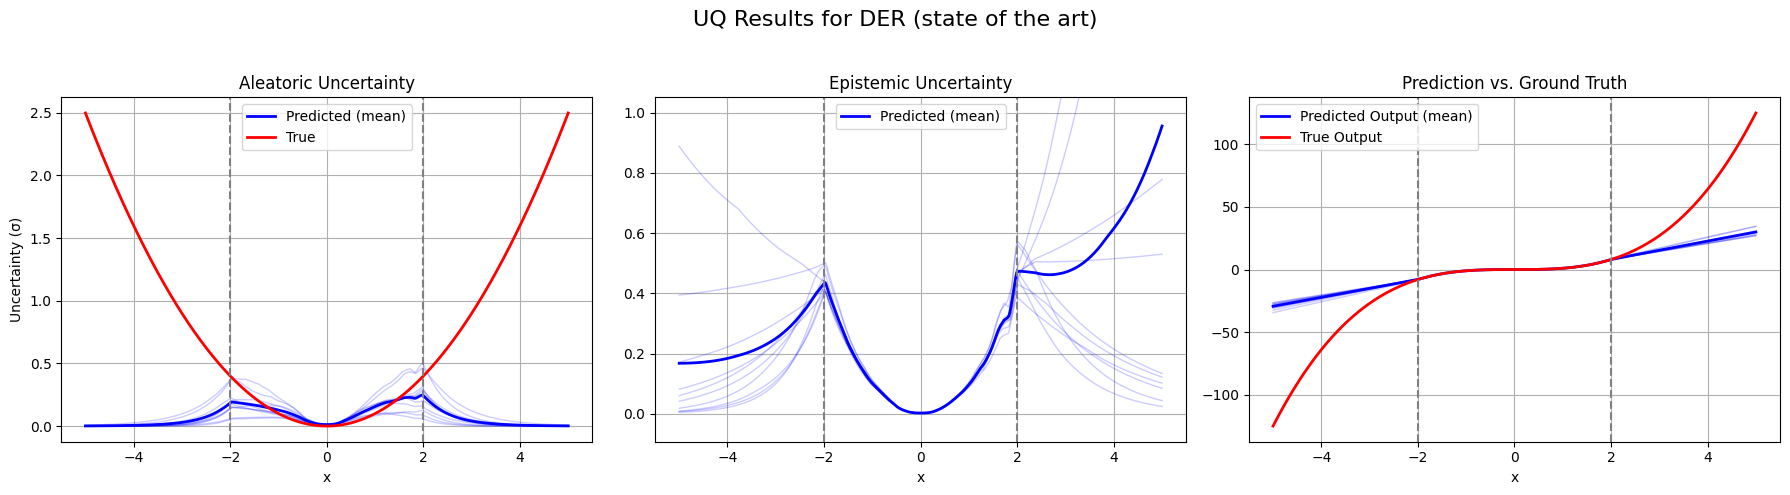

In [4]:
plot_uncertainties_and_predictions(
    bnn_single_feature["X_test"],
    bnn_single_feature["aleatoric_all"],
    bnn_single_feature["aleatoric_true"],
    bnn_single_feature["epistemic_all"],
    bnn_single_feature["y_test"],
    bnn_single_feature["y_pred_all"],
    title="UQ Results for BNN",
)

plot_uncertainties_and_predictions(
    bnn_single_feature["X_test"],
    bnn_single_feature["aleatoric_all"],
    bnn_single_feature["aleatoric_true"],
    bnn_single_feature["epistemic_all"],
    bnn_single_feature["y_test"],
    bnn_single_feature["y_pred_all"],
    title="UQ Results for BNN",
    x_min=-4,
    x_max=4,
)

plot_uncertainties_and_predictions(
    bnn_single_feature_sparse["X_test"],
    bnn_single_feature_sparse["aleatoric_all"],
    bnn_single_feature_sparse["aleatoric_true"],
    bnn_single_feature_sparse["epistemic_all"],
    bnn_single_feature_sparse["y_test"],
    bnn_single_feature_sparse["y_pred_all"],
    title="UQ Results for BNN (sparse)",
)

plot_uncertainties_and_predictions(
    der_single_feature_proposed["X_test"],
    der_single_feature_proposed["aleatoric_all"],
    der_single_feature_proposed["aleatoric_true"],
    der_single_feature_proposed["epistemic_all"],
    der_single_feature_proposed["y_test"],
    der_single_feature_proposed["y_pred_all"],
    title="UQ Results for DER as proposed by Meinert et al. (2023)",
    x_min=-4,
    x_max=4,
)

plot_uncertainties_and_predictions(
    der_single_feature_proposed_sparse["X_test"],
    der_single_feature_proposed_sparse["aleatoric_all"],
    der_single_feature_proposed_sparse["aleatoric_true"],
    der_single_feature_proposed_sparse["epistemic_all"],
    der_single_feature_proposed_sparse["y_test"],
    der_single_feature_proposed_sparse["y_pred_all"],
    title="UQ Results for DER as proposed by Meinert et al. (2023) (sparse)",
)

#plot_uncertainties_and_predictions(
#     der_single_feature_sota["X_test"],
#     der_single_feature_sota["aleatoric_all"],
#     der_single_feature_sota["aleatoric_true"],
#     der_single_feature_sota["epistemic_all"],
#     der_single_feature_sota["y_test"],
#     der_single_feature_sota["y_pred_all"],
#     title="UQ Results for DER (state of the art)",
# )

plot_uncertainties_and_predictions(
    der_single_feature_sota["X_test"],
    10*der_single_feature_sota["aleatoric_all"],
    der_single_feature_sota["aleatoric_true"],
    der_single_feature_sota["epistemic_all"],
    der_single_feature_sota["y_test"],
    der_single_feature_sota["y_pred_all"],
    title="UQ Results for DER (state of the art)",
    x_min=-5,
    x_max=5,
)

In [6]:
# Create table that compares MAE and MSE for each model
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

bnn_single_feature_filtered = load_meta_model_benchmarking_filtered_results(
    "250803_2311_bnn_single_feature", -2, 2)

bnn_single_feature_sparse_filtered = load_meta_model_benchmarking_filtered_results(
    "250803_2236_bnn_single_feature_sparse", -2, 2)

der_single_feature_proposed_filtered = load_meta_model_benchmarking_filtered_results(
    "250803_2300_der_single_feature_meinert_etal_proposed", -2, 2)

der_single_feature_proposed_sparse_filtered = load_meta_model_benchmarking_filtered_results(
    "250803_2251_der_single_feature_meinert_etal_proposed_sparse", -2, 2)

der_single_feature_sota_filtered = load_meta_model_benchmarking_filtered_results(
    "250803_2325_der_single_feature_meinert_etal_sota_", -2, 2)

# Dictionary mit allen geladenen Ergebnissen
benchmark_results = {
    "BNN (standard)": bnn_single_feature_filtered,
    "BNN (sparse)": bnn_single_feature_sparse_filtered,
    "DER (proposed)": der_single_feature_proposed_filtered,
    "DER (proposed, sparse)": der_single_feature_proposed_sparse_filtered,
    "DER (SOTA)": der_single_feature_sota_filtered
}

# Fehlermaße berechnen
rows = []
for name, result in benchmark_results.items():
    y_pred = np.array(result["y_pred"])
    y_true = np.array(result["y_test"])
    
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    
    rows.append({
        "Method": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse
    })

# Ergebnis-Tabelle
df_errors = pd.DataFrame(rows)
df_errors = df_errors.sort_values("RMSE")
print(df_errors)


                   Method       MAE       MSE      RMSE
4              DER (SOTA)  0.007928  0.000204  0.014276
3  DER (proposed, sparse)  0.012764  0.000393  0.019819
2          DER (proposed)  0.012390  0.000598  0.024460
1            BNN (sparse)  0.076528  0.028966  0.170193
0          BNN (standard)  0.117342  0.082632  0.287458
